**Banknote Classification with KNN**

This dataset consists of 1500 rows and 7 columns, with each row representing a banknote. The goal of the dataset is to predict whether the banknotes are genuine or counterfeit. The is_genuine column defines this target variable. The other columns describe various physical characteristics of the banknotes.


In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-bills/fake_bills.csv


In [2]:
df = pd.read_csv("/kaggle/input/fake-bills/fake_bills.csv",sep=";")
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

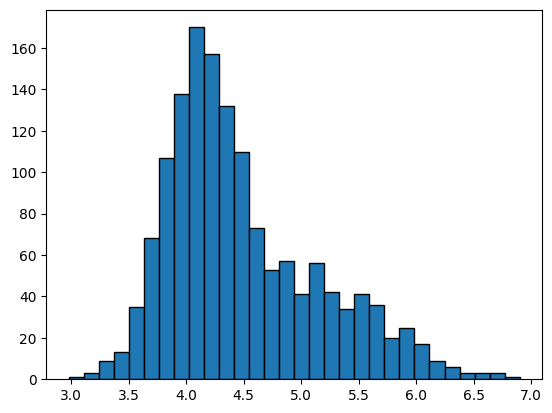

In [5]:
import matplotlib.pyplot as plt
plt.hist(df["margin_low"], bins=30, edgecolor='black')
plt.show()

In [6]:
df["margin_low"].fillna(df["margin_low"].mean(), inplace=True)
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [7]:
df["is_genuine"]=df["is_genuine"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [9]:
X=df[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
y=df["is_genuine"]

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**KNN (K-Nearest Neighbors)** is a supervised learning algorithm primarily used for classification and regression problems.

1. **Neighbor Selection:**
To predict the class of a data point, the algorithm looks at the k nearest neighbors surrounding the data point.

2. **Distance Calculation:**
Various distance metrics are used to measure the distance between neighbors. The most common ones are:

* Euclidean Distance: Measures the straight-line distance between two data points.
* Manhattan Distance: Measures the distance between two data points along axes at right angles (in a grid-like structure).
* Minkowski Distance: A generalization of both Euclidean and Manhattan distances.
3. **Class Prediction:**

* Classification: The class of the new data point is determined by the majority vote of the k neighbors. For example, if 3 out of 5 neighbors belong to class "A" and 2 belong to class "B," the new data point is classified as class "A."
* Regression: For regression tasks, the predicted value for the new data point is the average or median value of the k neighbors.


**The Elbow Method** is a commonly used technique to select the optimal number of neighbors (k value) in clustering or classification algorithms such as KNN. By using this method, the model's accuracy can be examined for different ranges of k values.

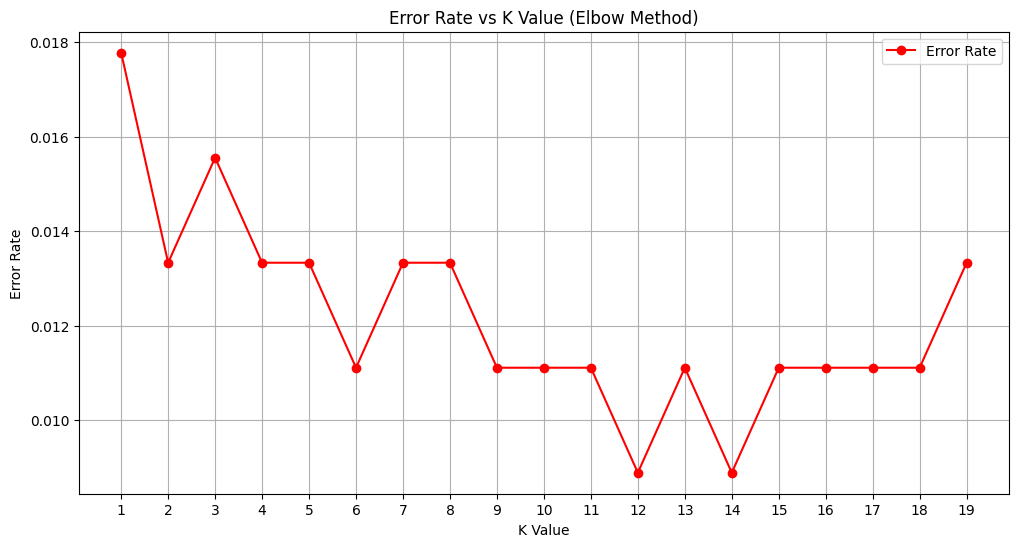

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

error_rate = []
for k in range(1, 20): 
    model = KNeighborsClassifier(n_neighbors=k) 
    model.fit(X_train_scaled, y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))  

# Elbow grafiğini çizme
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_rate, marker='o', color='red', linestyle='-', label='Error Rate')
plt.title('Error Rate vs K Value (Elbow Method)')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 20)) 
plt.grid(True)
plt.legend()
plt.show()


In [12]:
optimal_k=np.argmin(error_rate) +1 
print("optimal k:", optimal_k)

best_model = KNeighborsClassifier(n_neighbors=optimal_k)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Best accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

optimal k: 12
Best accuracy: 0.9911111111111112

Confusion matrix:
[[157   4]
 [  0 289]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



**Bonus: SVM Model** 



In [13]:
from sklearn.svm import SVC
model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search=GridSearchCV(estimator= model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred= best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9955555555555555
